<a href="https://colab.research.google.com/github/KaydenRumsey/DataAnalysisCapstone/blob/main/KaydenRumseyCapStoneFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Real Estate Price Analysis

In this project, I explored a large real estate dataset to uncover patterns in housing prices, clean and prepare data for analysis, and ultimately build a predictive model. The goal was to simulate a real-world analytics problem where understanding pricing trends could help drive better investment and development decisions.



## Business Problem

Property prices vary significantly depending on a wide range of factors like size, location, and building age. Real estate professionals, investors, and even first-time home buyers need a way to evaluate what drives price changes in the market.

This project attempts to answer:

- What factors most impact real estate prices?
- Can we build a model that accurately predicts housing prices based on apartment features?



## Dataset & Cleaning

The dataset came from a global real estate listing Excel file with over 140,000 entries. It included fields like apartment size, number of rooms, construction year, and more.

Key cleaning steps:
- Removed null values from critical fields like price
- Converted size values from strings to numeric (e.g., "45 m²" → 45)
- Handled missing data in numeric fields with median imputation
- Removed outliers using IQR method for price and size

These steps ensured the data was consistent and usable for analysis and modeling.



## Exploratory Data Analysis

After cleaning, I explored the dataset visually and statistically:
- Plotted price and area distributions
- Created correlation heatmaps
- Binned apartment sizes to analyze how price changes with space

This helped highlight skewed distributions and uncover relationships between apartment features and pricing.



## Modeling: Predicting Price

I used a Random Forest regression model to predict apartment prices based on variables like total area, number of rooms, and building age.

After training and testing the model, I evaluated it using:
- R² Score: how well the model explains variance in prices
- RMSE: the average error in predicted prices

Feature importance was also plotted to understand which factors had the greatest impact.



## Key Insights

- **Apartment size** (total area) was the most influential feature
- **Number of rooms and bathrooms** also strongly contributed to price
- **Older buildings** tended to have lower prices, suggesting depreciation
- The model performed well, giving a reasonable estimate of price trends even without detailed location data



## Conclusion & Next Steps

This project demonstrates the full workflow of a data analytics problem—from raw data to actionable insights and a working predictive model.

If this were a real-world project, the next steps might include:
- Adding geographic data (latitude/longitude or city)
- Tuning the model for better accuracy

Thanks for reviewing this project!


Null Cleanup and Initial Preprocessing

In [1]:
import pandas as pd
import numpy as np

file_path = '/content/WorldRealEstateData.xlsx'
xls = pd.ExcelFile(file_path)
df = xls.parse('world_real_estate_data(147k)')

null_summary = df.isnull().sum().sort_values(ascending=False)
null_percent = (df.isnull().sum() / len(df)) * 100
null_df = pd.DataFrame({'Missing Values': null_summary, 'Percent Missing': null_percent})
print(null_df)

def clean_area(col):
    return pd.to_numeric(df[col].str.replace(" m²", "", regex=False), errors='coerce')

df['apartment_total_area'] = clean_area('apartment_total_area')
df['apartment_living_area'] = clean_area('apartment_living_area')

df = df.dropna(subset=['price_in_USD'])

num_cols = ['building_construction_year', 'building_total_floors', 'apartment_floor',
            'apartment_rooms', 'apartment_bedrooms', 'apartment_bathrooms',
            'apartment_total_area', 'apartment_living_area']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print("\nAfter cleanup:")
print(df.isnull().sum())

                            Missing Values  Percent Missing
apartment_bathrooms                  91563        62.061463
apartment_bedrooms                  110554        74.933576
apartment_floor                      92944        62.997506
apartment_living_area               119824        81.216788
apartment_rooms                      73358        49.722102
apartment_total_area                  5740         3.890576
building_construction_year           82817        56.133418
building_total_floors                79312        53.757727
country                                130         0.088114
image                                    0         0.000000
location                               131         0.088792
price_in_USD                          2575         1.745337
title                                    0         0.000000
url                                      0         0.000000

After cleanup:
title                           0
country                       130
location        

<ipython-input-1-7b022a6eb4fd>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].median())


Descriptive Statistics + Null Pattern Visual

,title,country,location,building_construction_year,building_total_floors,apartment_floor,apartment_rooms,apartment_bedrooms,apartment_bathrooms,apartment_total_area,apartment_living_area,price_in_USD,image,url
count,144961,144831,144830,144961.000000,144961.000000,144961.000000,144961.000000,144961.000000,144961.000000,144961.000000,144961.000000,1.449610e+05,144961,144961
unique,77130,27,7188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111402,144961
top,"1 room apartment 24 m² in poselenie Sosenskoe,...",Turkey,"Mediterranean Region, Sekerhane Mahallesi, Ala...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://realting.com/uploads/bigSlider/9b9/e2b...,https://realting.com/property-for-sale/turkey/...
freq,486,25648,7231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1219,1
mean,NaN,NaN,NaN,2010.294866,6.662592,4.664220,2.290113,2.074399,1.140196,125.265009,51.445713,4.121722e+05,NaN,NaN
std,NaN,NaN,NaN,105.923481,5.962964,3.486917,0.981684,9.232030,0.495258,115.337590,38.633472,8.420984e+05,NaN,NaN
min,NaN,NaN,NaN,1.000000,-1.000000,-2.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,2021.000000,5.000000,4.000000,2.000000,2.000000,1.000000,58.000000,46.000000,1.054200e+05,NaN,NaN
50%,NaN,NaN,NaN,2021.000000,5.000000,4.000000,2.000000,2.000000,1.000000,88.000000,46.000000,1.902120e+05,NaN,NaN
75%,NaN,NaN,NaN,2021.000000,5.000000,4.000000,2.000000,2.000000,1.000000,146.000000,46.000000,3.989300e+05,NaN,NaN


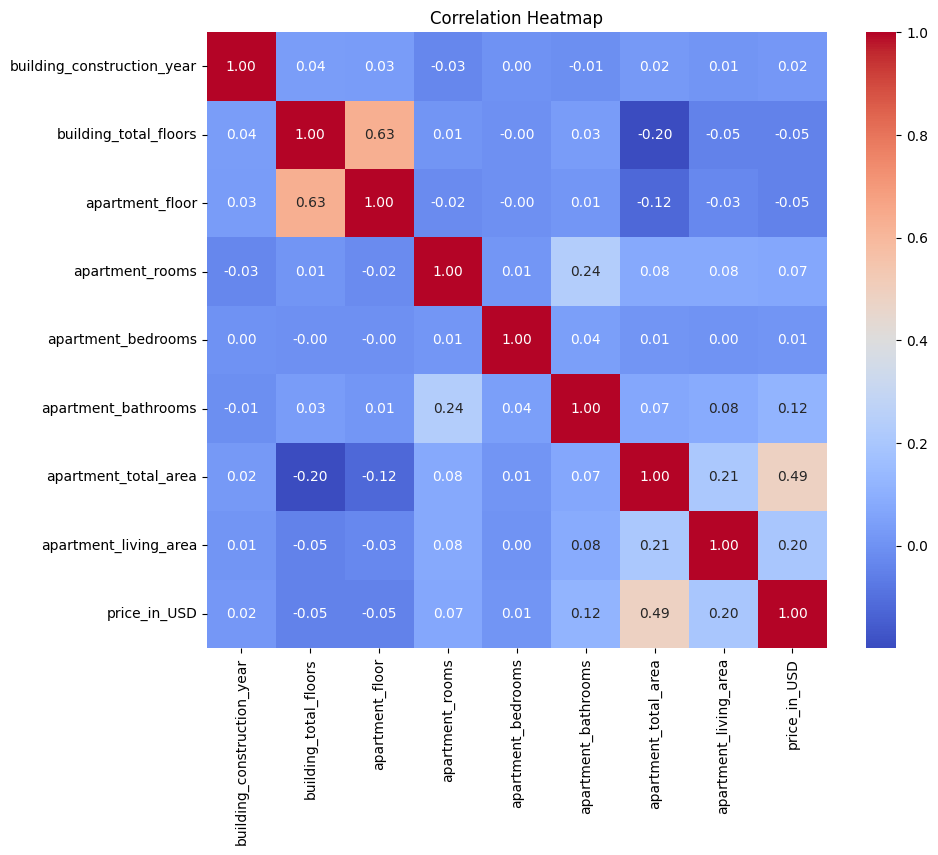

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

display(df.describe(include='all'))

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Price Distribution

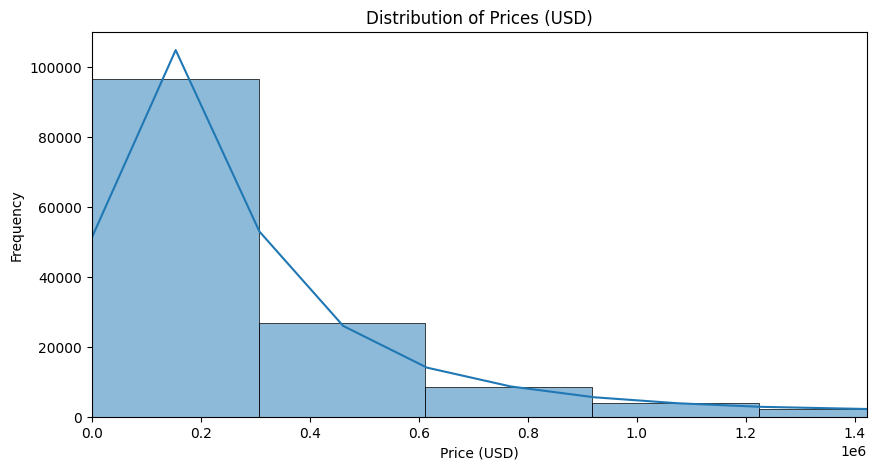

In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price_in_USD'], bins=100, kde=True)
plt.xlim(0, df['price_in_USD'].quantile(0.95))
plt.title("Distribution of Prices (USD)")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

Apartment Total Area

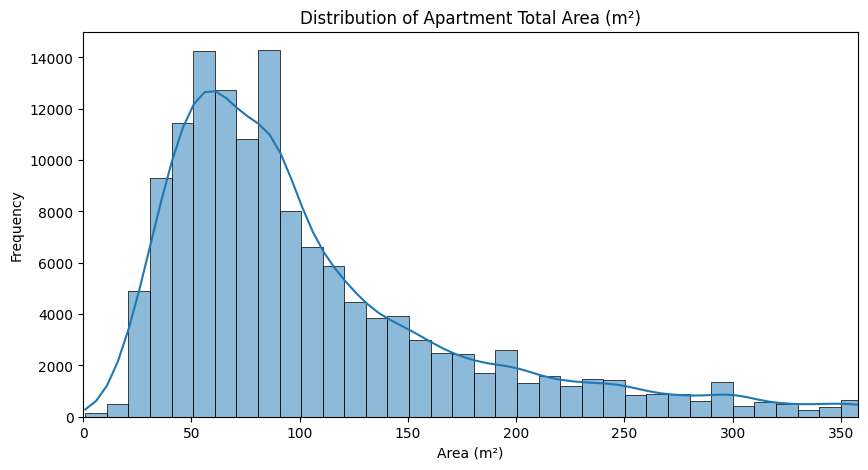

In [4]:
plt.figure(figsize=(10, 5))
sns.histplot(df['apartment_total_area'], bins=100, kde=True)
plt.xlim(0, df['apartment_total_area'].quantile(0.95))
plt.title("Distribution of Apartment Total Area (m²)")
plt.xlabel("Area (m²)")
plt.ylabel("Frequency")
plt.show()

Price vs Total Area

<ipython-input-5-6509cb508370>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_bin = binned.groupby('area_bin')['price_in_USD'].mean()


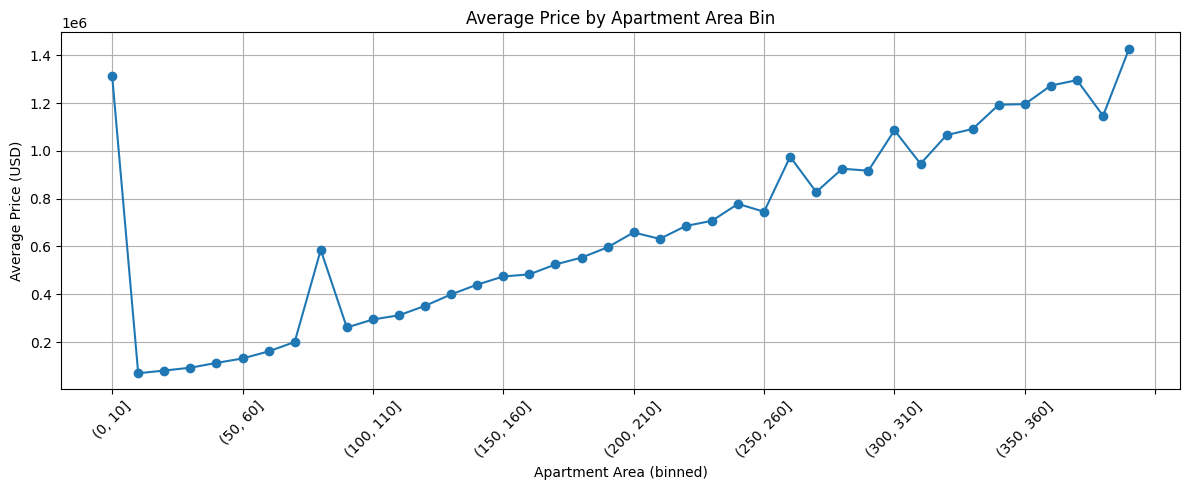

In [5]:
binned = df[df['apartment_total_area'] < 400].copy()
binned['area_bin'] = pd.cut(binned['apartment_total_area'], bins=np.arange(0, 410, 10))
avg_price_by_bin = binned.groupby('area_bin')['price_in_USD'].mean()

plt.figure(figsize=(12, 5))
avg_price_by_bin.plot(kind='line', marker='o')
plt.title("Average Price by Apartment Area Bin")
plt.xlabel("Apartment Area (binned)")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Average Price by Country

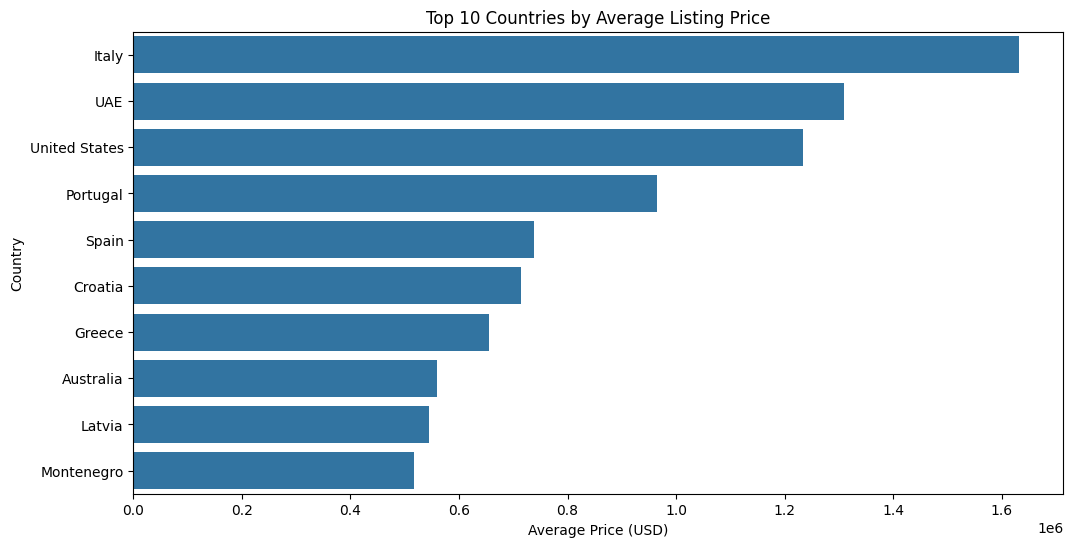

In [6]:
top_countries = df.groupby("country")["price_in_USD"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Average Listing Price")
plt.xlabel("Average Price (USD)")
plt.ylabel("Country")
plt.show()

Best Countries for Real Estate Investment (By Price Per Square Meter)

This analysis uses price per square meter to identify countries with the best real estate value. Lower PPSM often signals better investment potential, especially in emerging or developing markets.

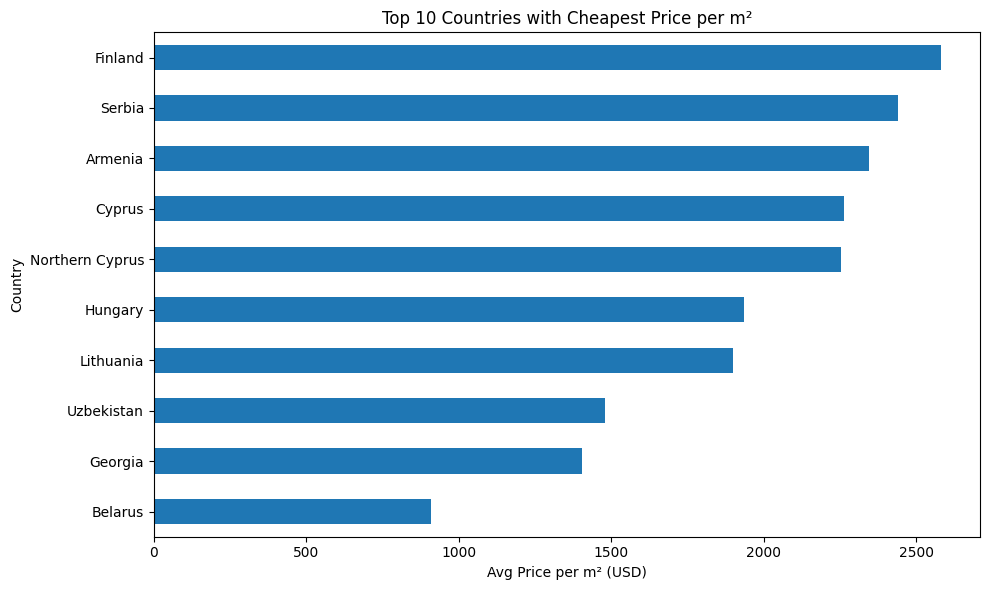

In [7]:
df['price_per_m2'] = df['price_in_USD'] / df['apartment_total_area']

filtered_df = df[(df['price_per_m2'] > 50) & (df['price_per_m2'] < 20000)]

ppsm_by_country = filtered_df.groupby('country')['price_per_m2'].mean().sort_values()

ppsm_by_country.head(10).plot(kind='barh', figsize=(10, 6), title="Top 10 Countries with Cheapest Price per m²")
plt.xlabel("Avg Price per m² (USD)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Top Cities for Real Estate Investment

  We analyzed cities with at least 30 real estate listings to ensure consistency. The metric used was average price per square meter, which helps identify locations where real estate is undervalued or affordable.

  Cities with low PPSM and a healthy number of listings are strong candidates for investment, especially if they show signs of new development.

<ipython-input-8-56b222b7441e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['city_country'] = filtered_df['city'] + ', ' + filtered_df['country']


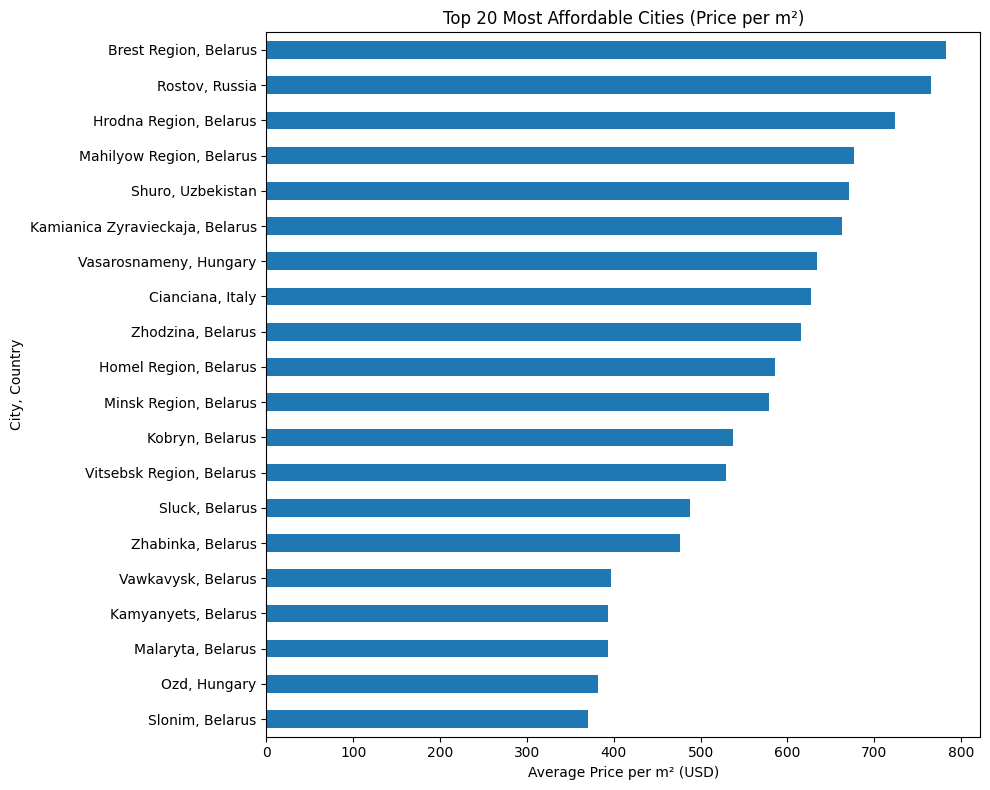

In [8]:
df['city'] = df['location'].astype(str).str.split(',').str[0].str.strip()

df['price_per_m2'] = df['price_in_USD'] / df['apartment_total_area']

filtered_df = df[
    (df['price_per_m2'] > 50) &
    (df['price_per_m2'] < 20000) &
    (df['city'].notnull()) &
    (df['country'].notnull())
]

filtered_df['city_country'] = filtered_df['city'] + ', ' + filtered_df['country']

city_country_ppsm = filtered_df.groupby('city_country').agg({
    'price_per_m2': 'mean',
    'price_in_USD': 'count'
}).rename(columns={'price_in_USD': 'listing_count'}).sort_values(by='price_per_m2')

city_country_ppsm_filtered = city_country_ppsm[city_country_ppsm['listing_count'] >= 30]

top_20_city_country = city_country_ppsm_filtered.head(20)

top_20_city_country['price_per_m2'].plot(
    kind='barh',
    figsize=(10, 8),
    title="Top 20 Most Affordable Cities (Price per m²)"
)
plt.xlabel("Average Price per m² (USD)")
plt.ylabel("City, Country")
plt.tight_layout()
plt.show()

Most Expensive Cities for Real Estate

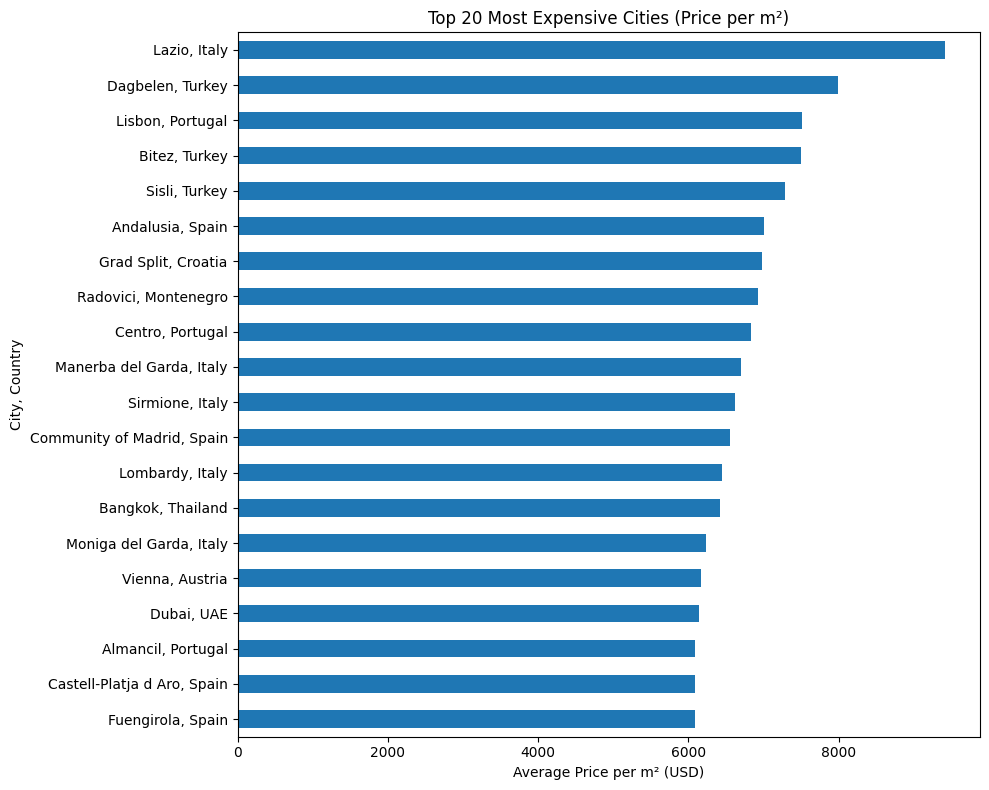

In [9]:
top_20_expensive = city_country_ppsm_filtered.sort_values(by='price_per_m2', ascending=False).head(20)

top_20_expensive['price_per_m2'].plot(
    kind='barh',
    figsize=(10, 8),
    title="Top 20 Most Expensive Cities (Price per m²)"
)
plt.xlabel("Average Price per m² (USD)")
plt.ylabel("City, Country")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Plot Side by Side

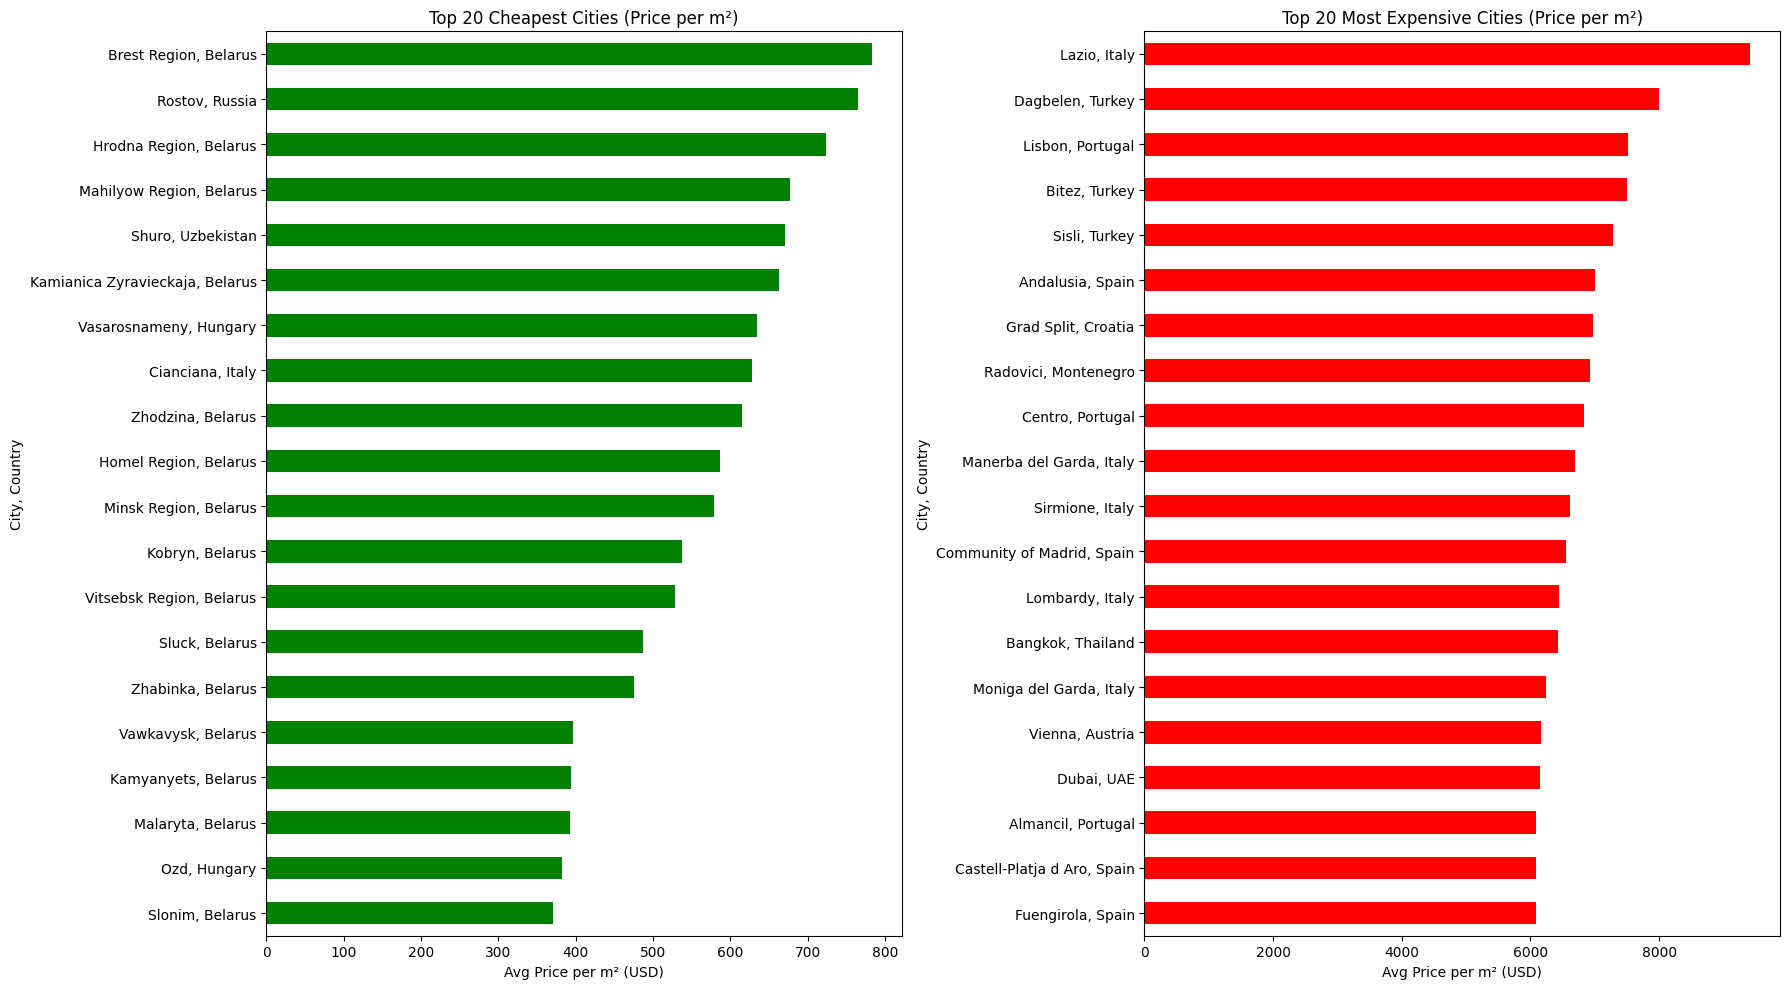

In [10]:
top_20_cheapest = city_country_ppsm_filtered.sort_values(by='price_per_m2').head(20)
top_20_expensive = city_country_ppsm_filtered.sort_values(by='price_per_m2', ascending=False).head(20)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10), sharex=False)

top_20_cheapest['price_per_m2'].plot(
    kind='barh',
    ax=axes[0],
    color='green',
    title='Top 20 Cheapest Cities (Price per m²)'
)
axes[0].set_xlabel('Avg Price per m² (USD)')
axes[0].set_ylabel('City, Country')

top_20_expensive['price_per_m2'].plot(
    kind='barh',
    ax=axes[1],
    color='red',
    title='Top 20 Most Expensive Cities (Price per m²)'
)
axes[1].set_xlabel('Avg Price per m² (USD)')
axes[1].set_ylabel('City, Country')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

Outlier Removal

In [11]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers_iqr(df, 'price_in_USD')
df = remove_outliers_iqr(df, 'apartment_total_area')
print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (121514, 16)


Feature Engineering

In [12]:
df['price_per_sqm'] = df['price_in_USD'] / df['apartment_total_area']
df['building_age'] = 2025 - df['building_construction_year']
df['apartment_floor_ratio'] = df['apartment_floor'] / df['building_total_floors']
df['apartment_floor_ratio'].fillna(0, inplace=True)
print(df[['price_per_sqm', 'building_age', 'apartment_floor_ratio']].describe())

       price_per_sqm   building_age  apartment_floor_ratio
count  121514.000000  121514.000000          121514.000000
mean     2592.384161      15.661208               0.909750
std      5683.415742     112.592751               0.767266
min         0.000000    -291.000000              -1.000000
25%      1358.657209       4.000000               0.714286
50%      2255.193702       4.000000               0.800000
75%      3188.316667       4.000000               0.800000
max    765071.000000    2024.000000              35.000000


<ipython-input-12-fa00dc55cb77>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['apartment_floor_ratio'].fillna(0, inplace=True)


Feature Importance

R² Score: 0.4423974495462111
RMSE: 124713.87015192887


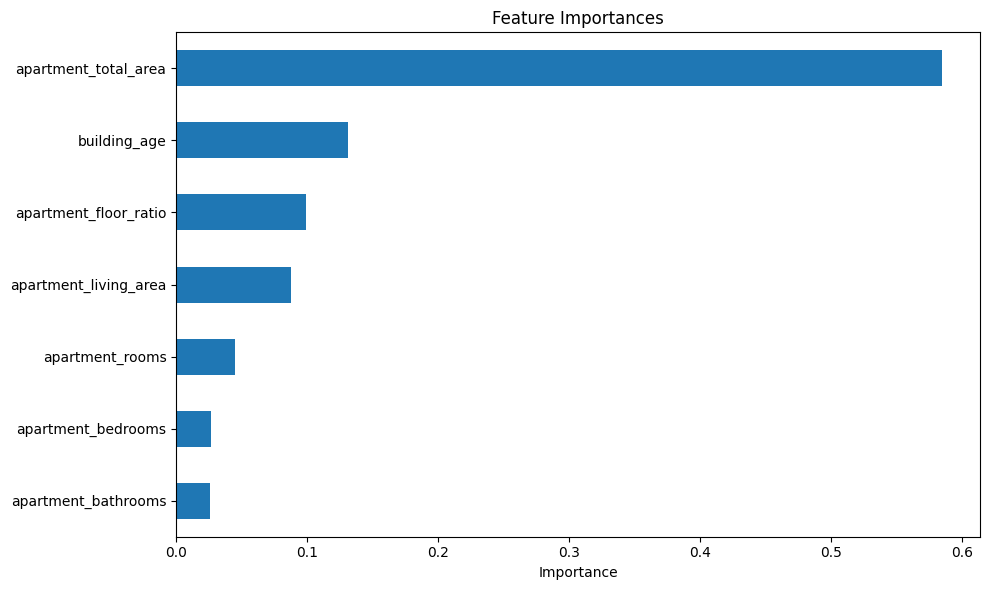

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

features = ['apartment_total_area', 'apartment_living_area', 'apartment_rooms',
            'apartment_bedrooms', 'apartment_bathrooms', 'building_age',
            'apartment_floor_ratio']

X = df[features]
y = df['price_in_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(10, 6), title='Feature Importances')
plt.xlabel("Importance")
plt.tight_layout()
plt.show()